In [1]:
# 1. Load suitability maps

In [1]:
import rasterio
import rioxarray as rxr
import xarray as xr
import numpy as np
import os


In [7]:
coffee = rxr.open_rasterio("/Users/szelie/data/unu/suitability/COFFAR_baseline.tif", masked=True).squeeze()
cacao = rxr.open_rasterio("/Users/szelie/data/unu/suitability/THEOCA_baseline.tif", masked=True).squeeze()


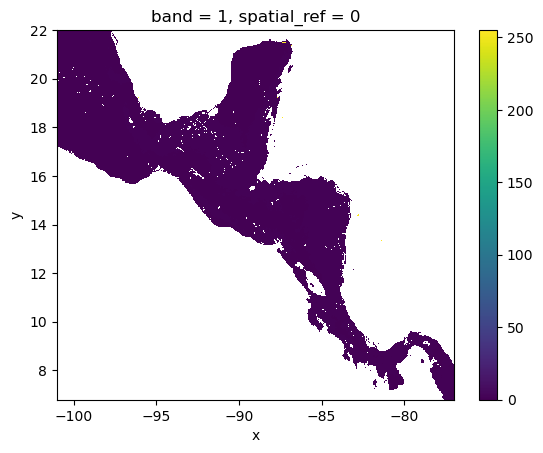

In [9]:
cacao.plot()

In [3]:
tree_stack = rxr.open_rasterio("/Users/szelie/data/unu/suitability/trees_baseline.grd", masked=True)


In [4]:
tree_stack

<xarray.DataArray (band: 100, y: 365, x: 576)> Size: 84MB
[21024000 values with dtype=float32]
Coordinates:
  * band         (band) int64 800B 1 2 3 4 5 6 7 8 ... 93 94 95 96 97 98 99 100
  * x            (x) float64 5kB -101.0 -100.9 -100.9 ... -77.1 -77.06 -77.02
  * y            (y) float64 3kB 21.98 21.94 21.9 21.85 ... 6.896 6.854 6.812
    spatial_ref  int64 8B 0
Attributes:
    CREATOR:       R package 'raster'
    CREATED:       2018-06-09 10:39:08
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('GLIRSE', 'CORDAL', 'GUAZUL', 'TABERO', 'BURSSI', 'CEDROD...

In [136]:
import rioxarray as rxr
import xarray as xr

paths = [
    "/Users/szelie/data/unu/WORLDCOVER/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N15W072_Map/ESA_WorldCover_10m_2021_v200_N15W072_Map.tif",
    "/Users/szelie/data/unu/WORLDCOVER/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N18W069_Map/ESA_WorldCover_10m_2021_v200_N18W069_Map.tif",
    "/Users/szelie/data/unu/WORLDCOVER/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N18W072_Map/ESA_WorldCover_10m_2021_v200_N18W072_Map.tif"
]

# Load and strip attributes from each tile
tiles = [rxr.open_rasterio(p, masked=True).squeeze().assign_attrs({}) for p in paths]

# Combine without metadata conflict
landcover = xr.combine_by_coords(tiles, combine_attrs="override").rio.write_crs(tiles[0].rio.crs)


KeyboardInterrupt: 

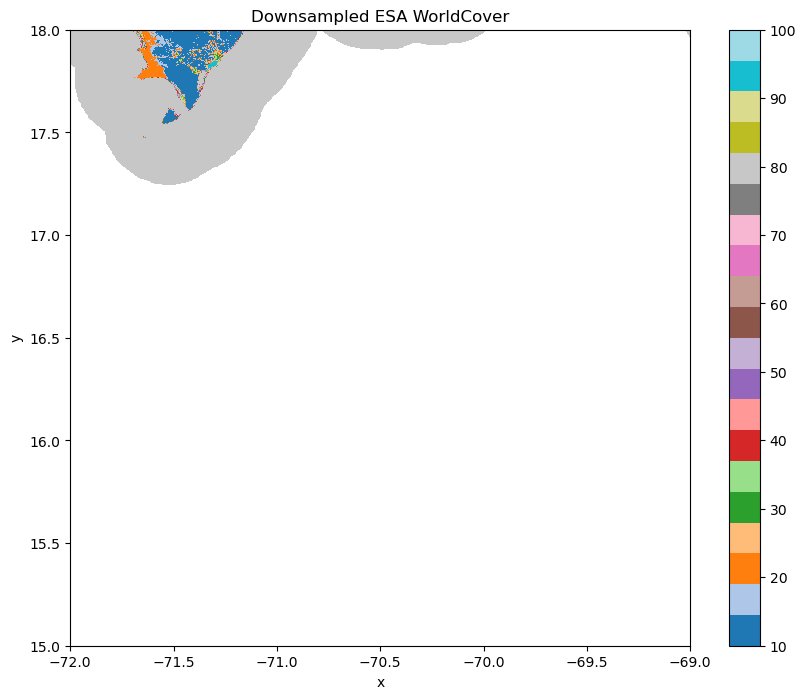

In [135]:
import matplotlib.pyplot as plt

# Downsample by factor of 50 (you can try 100 or 200 depending on the size)
lc_coarse = landcover.coarsen(x=50, y=50, boundary="trim").mean()

plt.figure(figsize=(10, 8))
lc_coarse.plot(cmap="tab20", vmin=10, vmax=100)
plt.title("Downsampled ESA WorldCover")
plt.show()


In [4]:
plantable_mask = landcover.isin([10, 20, 40])  # tree cover + cropland


In [5]:
agroforestry_likelihood = (landcover == 10)


In [3]:
from pygbif import occurrences as occ
import pandas as pd

# List of target agroforestry species
target_species = [
    "Coffea arabica",
    "Theobroma cacao",
    "Musa acuminata", "Musa paradisiaca",  # Banana
    "Persea americana",  # Avocado
    "Citrus sinensis", "Citrus aurantium", "Citrus limon", "Citrus paradisi", "Citrus reticulata",  # Citrus
    "Artocarpus altilis",  # Breadfruit
    "Pouteria sapota",  # Mamey sapote
    "Dioscorea alata",  # Yam
    "Colocasia esculenta",  # Taro (yautía)
    "Zingiber officinale"  # Ginger
]

# Fetch GBIF occurrences for each species in Dominican Republic
records = []

for species in target_species:
    print(f"Fetching: {species}")
    res = occ.search(scientificName=species, country="DO", hasCoordinate=True, limit=1000)
    for r in res["results"]:
        if r.get("decimalLatitude") and r.get("decimalLongitude"):
            records.append({
                "species": species,
                "decimalLatitude": r["decimalLatitude"],
                "decimalLongitude": r["decimalLongitude"],
                "year": r.get("year"),
                "basisOfRecord": r.get("basisOfRecord"),
                "datasetKey": r.get("datasetKey")
            })

# Create dataframe
df = pd.DataFrame(records)

# Save to CSV (optional)
df.to_csv("dominican_agroforestry_observations.csv", index=False)

# Quick check
print(f"Downloaded {len(df)} observations.")
df.head()


Fetching: Coffea arabica
Fetching: Theobroma cacao
Fetching: Musa acuminata
Fetching: Musa paradisiaca
Fetching: Persea americana
Fetching: Citrus sinensis
Fetching: Citrus aurantium
Fetching: Citrus limon
Fetching: Citrus paradisi
Fetching: Citrus reticulata
Fetching: Artocarpus altilis
Fetching: Pouteria sapota
Fetching: Dioscorea alata
Fetching: Colocasia esculenta
Fetching: Zingiber officinale
Downloaded 312 observations.


,species,decimalLatitude,decimalLongitude,year,basisOfRecord,datasetKey
0,Coffea arabica,19.271194,-71.243197,2025,HUMAN_OBSERVATION,50c9509d-22c7-4a22-a47d-8c48425ef4a7
1,Coffea arabica,19.671327,-70.386065,2024,HUMAN_OBSERVATION,50c9509d-22c7-4a22-a47d-8c48425ef4a7
2,Coffea arabica,19.061625,-69.456908,2024,HUMAN_OBSERVATION,50c9509d-22c7-4a22-a47d-8c48425ef4a7
3,Coffea arabica,19.067460,-70.572627,2024,HUMAN_OBSERVATION,50c9509d-22c7-4a22-a47d-8c48425ef4a7
4,Coffea arabica,18.801370,-70.357110,2024,HUMAN_OBSERVATION,50c9509d-22c7-4a22-a47d-8c48425ef4a7


In [ ]:
https://www.forestcarbonpartnership.org/system/files/documents/7._repuiblique_dominicaine-es_419-en_us-c.pdf

In [6]:
from pygbif import occurrences as occ
import pandas as pd

# List of species
target_species = [
    "Coffea arabica",
    "Theobroma cacao",
    "Musa acuminata", "Musa paradisiaca",
    "Persea americana",
    "Citrus sinensis", "Citrus aurantium", "Citrus limon", "Citrus paradisi", "Citrus reticulata",
    "Artocarpus altilis",
    "Pouteria sapota",
    "Dioscorea alata",
    "Colocasia esculenta",
    "Zingiber officinale"
]

# Fetch GBIF records for observations in DR after 2000
records = []

for species in target_species:
    print(f"Fetching: {species}")
    res = occ.search(scientificName=species, country="DO", hasCoordinate=True, limit=1000)
    for r in res["results"]:
        year = r.get("year")
        if (
            year and year > 2000 and
            r.get("decimalLatitude") and r.get("decimalLongitude")
        ):
            records.append({
                "species": species,
                "decimalLatitude": r["decimalLatitude"],
                "decimalLongitude": r["decimalLongitude"],
                "year": year,
                "basisOfRecord": r.get("basisOfRecord"),
                "datasetKey": r.get("datasetKey")
            })

# Create DataFrame
df = pd.DataFrame(records)

# Count observations per species
obs_counts = df["species"].value_counts().reset_index()
obs_counts.columns = ["species", "n_observations"]
print(obs_counts)


Fetching: Coffea arabica
Fetching: Theobroma cacao
Fetching: Musa acuminata
Fetching: Musa paradisiaca
Fetching: Persea americana
Fetching: Citrus sinensis
Fetching: Citrus aurantium
Fetching: Citrus limon
Fetching: Citrus paradisi
Fetching: Citrus reticulata
Fetching: Artocarpus altilis
Fetching: Pouteria sapota
Fetching: Dioscorea alata
Fetching: Colocasia esculenta
Fetching: Zingiber officinale
                species  n_observations
0       Theobroma cacao              70
1    Artocarpus altilis              68
2        Coffea arabica              38
3      Persea americana              33
4        Musa acuminata              21
5      Musa paradisiaca               8
6   Colocasia esculenta               8
7      Citrus aurantium               7
8       Pouteria sapota               7
9       Dioscorea alata               5
10         Citrus limon               2
11    Citrus reticulata               1
12  Zingiber officinale               1


In [9]:
world.name

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object

In [120]:
import matplotlib.pyplot as plt

# Define key crops and other species
key_species = ["Coffea arabica", "Theobroma cacao", "Musa acuminata", "Musa paradisiaca"]
gdf["species_group"] = gdf["species"].apply(lambda s: "Coffee" if s == "Coffea arabica" 
                                             else "Cacao" if s == "Theobroma cacao"
                                             else "Banana" if s in ["Musa acuminata", "Musa paradisiaca"]
                                             else "Other")

# Plot base
fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color="lightgrey", edgecolor="white")

# Zoom to DR
ax.set_xlim([-72, -68])
ax.set_ylim([17, 20])

# Plot each group with custom style
colors = {"Coffee": "brown", "Cacao": "darkgreen", "Banana": "gold", "Other": "grey"}
sizes = {"Coffee": 60, "Cacao": 60, "Banana": 60, "Other": 20}

for group in gdf["species_group"].unique():
    subset = gdf[gdf["species_group"] == group]
    subset.plot(ax=ax, color=colors[group], markersize=sizes[group], label=group)

# Add DR border if it exists
if not dr.empty:
    dr.plot(ax=ax, color="none", edgecolor="black", linewidth=1.5)

# Final plot tweaks
plt.title("Highlighted Agroforestry Species in the Dominican Republic")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Species")
plt.tight_layout()
plt.show()


KeyError: 'species'

In [85]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load GBIF observations
df = pd.read_csv("/Users/szelie/data/unu/gbif/0003107-250525065834625.csv", sep="\t")
df = df[df.kingdom=="Plantae"]
df["geometry"] = df.apply(lambda row: Point(row["decimalLongitude"], row["decimalLatitude"]), axis=1)
gdf_all = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

# Define key species
key_species = ["Coffea arabica", "Theobroma cacao", "Musa acuminata", "Musa paradisiaca"]
gdf_key = gdf_all[gdf_all["species"].isin(key_species)].copy()
gdf_key["uid"] = gdf_key.index

# Project to UTM zone 19N (EPSG:32619) for distance-based buffer in meters
gdf_all = gdf_all.to_crs("EPSG:32619")
gdf_key = gdf_key.to_crs("EPSG:32619")

# Save original point geometry before buffering
gdf_key["point_geometry"] = gdf_key.geometry

# Buffer each key species point by 300 meters (temporary for spatial join)
gdf_key["geometry"] = gdf_key.geometry.buffer(300)

# Spatial join: find all non-key plants within 300m of any key species
gdf_matches = gpd.sjoin(gdf_all, gdf_key, how="left", predicate="intersects")

# Remove self-matches
gdf_matches = gdf_matches[~gdf_matches["species_left"].isin(key_species)]

# Group associated species by crop location
grouped = gdf_matches.groupby("uid")["species_left"].apply(set).reset_index()

# Merge with original key points (restoring point geometry)
gdf_key["geometry"] = gdf_key["point_geometry"]
gdf_key_reset = gdf_key.reset_index()[["uid", "geometry", "species"]]

# Final merge and rename
result = pd.merge(gdf_key_reset, grouped, on="uid", how="left")
result["species_left"] = result["species_left"].apply(lambda x: x if isinstance(x, set) else set())
result = result.rename(columns={"species": "key_species", "species_left": "associated_species"})

# Project back to WGS84
result = result.set_geometry("geometry").set_crs("EPSG:32619").to_crs("EPSG:4326")



/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_69643/1808341648.py:6: DtypeWarning: Columns (10,14,16,38,39,40,41,43,45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/szelie/data/unu/gbif/0003107-250525065834625.csv", sep="\t")


In [117]:
df.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue', 'geometry'],
      dtype='object')

In [86]:
result

,uid,geometry,key_species,associated_species
0,28,POINT (-70.62000 18.98000),Coffea arabica,{}
1,81,POINT (-71.22754 19.60170),Theobroma cacao,{}
2,247,POINT (-69.65000 18.52000),Coffea arabica,{Plantago major}
3,322,POINT (-69.94000 18.48000),Coffea arabica,"{Tectaria heracleifolia, Annona haitiensis, Po..."
4,500,POINT (-71.44000 18.60000),Coffea arabica,{}
...,...,...,...,...
131,584677,POINT (-69.46615 19.06785),Theobroma cacao,"{Pteris tripartita, Guarea guidonia, Spathodea..."
132,584796,POINT (-70.41442 19.75092),Musa acuminata,"{Crescentia cujete, Terminalia catappa, Euphor..."
133,584990,POINT (-69.48076 18.67022),Theobroma cacao,{}
134,585046,POINT (-71.29601 18.11522),Coffea arabica,{}


In [56]:
# Only keep non-empty rows
non_empty = result[result["associated_species"].apply(lambda x: len(x) > 0)].copy()

# Explode the associated species into individual rows
exploded = non_empty.explode("associated_species")

# Group by key crop and associated species, then count
counts_per_crop = exploded.groupby(["key_species", "associated_species"]).size().reset_index(name="n_occurrences")

# Display
print(counts_per_crop.head(40))


       key_species        associated_species  n_occurrences
0   Coffea arabica       Acalypha persimilis              1
1   Coffea arabica       Acalypha wilkesiana              1
2   Coffea arabica    Acanthophora spicifera              1
3   Coffea arabica    Adiantum pulverulentum              1
4   Coffea arabica       Adiantum pyramidale              3
5   Coffea arabica          Agave intermixta              1
6   Coffea arabica      Aleurites moluccanus              1
7   Coffea arabica      Allamanda cathartica              1
8   Coffea arabica     Alocasia macrorrhizos              1
9   Coffea arabica            Ananas comosus              1
10  Coffea arabica       Anemia adiantifolia              1
11  Coffea arabica      Anemia underwoodiana              1
12  Coffea arabica         Annona haitiensis              1
13  Coffea arabica           Annona muricata              1
14  Coffea arabica        Anredera vesicaria              1
15  Coffea arabica        Antigonon lept

In [62]:
import numpy as np
np.unique(counts_per_crop[counts_per_crop.key_species=="Theobroma cacao"].associated_species)

array(['Acalypha alopecuroidea', 'Acalypha hispida',
       'Acalypha wilkesiana', 'Acrostichum danaeifolium',
       'Adiantum latifolium', 'Adiantum pyramidale', 'Adiantum tenerum',
       'Adonidia merrillii', 'Allamanda blanchetii',
       'Allamanda cathartica', 'Alocasia macrorrhizos',
       'Alpinia purpurata', 'Alpinia zerumbet', 'Amblovenatum opulentum',
       'Anacardium occidentale', 'Ananas comosus', 'Andira inermis',
       'Anemia adiantifolia', 'Annona muricata', 'Anthurium gracile',
       'Arachis hypogaea', 'Arachis repens', 'Aristolochia adiastola',
       'Arivela viscosa', 'Artocarpus altilis',
       'Artocarpus heterophyllus', 'Asclepias nivea',
       'Asparagus aethiopicus', 'Bacopa monnieri', 'Bambusa vulgaris',
       'Barleria cristata', 'Bauhinia variegata', 'Bidens alba',
       'Bixa orellana', 'Bougainvillea glabra', 'Brunfelsia americana',
       'Brunfelsia pauciflora', 'Bursera simaruba',
       'Caesalpinia pulcherrima', 'Cajanus cajan', 'Calathea 

In [139]:
import numpy as np
import geopandas as gpd
import rasterio
from shapely.geometry import box
import pandas as pd

gdf = result
gdf["canopy_height"] = np.nan
gdf["forest_cover"] = np.nan
gdf["land_use"] = np.nan

# Define raster tiles
raster_layers = {
    "canopy_height": [
        "/Users/szelie/data/unu/canopy/ETH_GlobalCanopyHeight_10m_2020_N18W069_Map.tif",
        "/Users/szelie/data/unu/canopy/ETH_GlobalCanopyHeight_10m_2020_N18W072_Map.tif"
    ],
    "forest_cover": [
    "/Users/szelie/data/unu/tree_cover/20N_070W.tif",
    "/Users/szelie/data/unu/tree_cover/20N_080W.tif",
    "/Users/szelie/data/unu/tree_cover/20N_090W.tif"
],
    "land_use": [
        "/Users/szelie/data/unu/WORLDCOVER/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N18W069_Map/ESA_WorldCover_10m_2021_v200_N18W069_Map.tif",
        "/Users/szelie/data/unu/WORLDCOVER/ESA_WORLDCOVER_10M_2021_V200/MAP/ESA_WorldCover_10m_2021_v200_N18W072_Map/ESA_WorldCover_10m_2021_v200_N18W072_Map.tif"
    ]
}

# Loop through layers and tiles
for col, tiles in raster_layers.items():
    for tile in tiles:
        with rasterio.open(tile) as src:
            gdf_rp = gdf.to_crs(src.crs)
            bounds = box(*src.bounds)
            gdf_in_tile = gdf_rp[gdf_rp.geometry.within(bounds)]

            if gdf_in_tile.empty:
                continue

            coords = [(pt.x, pt.y) for pt in gdf_in_tile.geometry]
            values = [val[0] for val in src.sample(coords)]
            gdf.loc[gdf_in_tile.index, col] = values

# Clean invalid forest_cover values
gdf["forest_cover"] = gdf["forest_cover"].where(gdf["forest_cover"] <= 250, np.nan)


In [91]:
esa_classes = {
    10: "Tree cover",
    20: "Shrubland",
    30: "Grassland",
    40: "Cropland",
    50: "Built-up",
    60: "Bare / sparse vegetation",
    70: "Snow and ice",
    80: "Permanent water bodies",
    90: "Herbaceous wetland",
    95: "Mangroves",
    100: "Moss and lichen"
}

# Replace land use codes with class names
gdf["land_use_class"] = gdf["land_use"].map(esa_classes)


In [93]:
import numpy as np

cols_to_clean = ["canopy_height", "forest_cover", "land_use"]

for col in cols_to_clean:
    gdf[col] = gdf[col].replace(255, np.nan)

In [94]:
gdf

,uid,geometry,key_species,associated_species,canopy_height,forest_cover,land_use,land_use_class
0,28,POINT (-70.62000 18.98000),Coffea arabica,{},17.0,88.0,10.0,Tree cover
1,81,POINT (-71.22754 19.60170),Theobroma cacao,{},6.0,0.0,10.0,Tree cover
2,247,POINT (-69.65000 18.52000),Coffea arabica,{Plantago major},10.0,70.0,30.0,Grassland
3,322,POINT (-69.94000 18.48000),Coffea arabica,"{Tectaria heracleifolia, Annona haitiensis, Po...",NaN,NaN,50.0,Built-up
4,500,POINT (-71.44000 18.60000),Coffea arabica,{},12.0,29.0,30.0,Grassland
...,...,...,...,...,...,...,...,...
131,584677,POINT (-69.46615 19.06785),Theobroma cacao,"{Pteris tripartita, Guarea guidonia, Spathodea...",25.0,92.0,10.0,Tree cover
132,584796,POINT (-70.41442 19.75092),Musa acuminata,"{Crescentia cujete, Terminalia catappa, Euphor...",8.0,21.0,10.0,Tree cover
133,584990,POINT (-69.48076 18.67022),Theobroma cacao,{},14.0,35.0,30.0,Grassland
134,585046,POINT (-71.29601 18.11522),Coffea arabica,{},28.0,97.0,10.0,Tree cover


In [95]:
gdf["has_associates"] = gdf["associated_species"].apply(lambda x: len(x) > 0)

# Summary statistics
summary = gdf.groupby("has_associates")[["canopy_height", "forest_cover"]].describe()


In [96]:
summary

canopy_height                                               \
                       count       mean       std  min   25%   50%    75%   
has_associates                                                              
False                   30.0  17.333333  6.315462  0.0  14.0  17.0  21.75   
True                    87.0  15.747126  4.688478  7.0  13.0  15.0  19.00   

                     forest_cover                                         \
                 max        count       mean        std  min   25%   50%   
has_associates                                                             
False           30.0         37.0  60.405405  32.569123  0.0  35.0  69.0   
True            29.0         86.0  62.976744  30.870499  1.0  38.0  74.0   

                              
                  75%    max  
has_associates                
False           89.00   99.0  
True            90.75  100.0

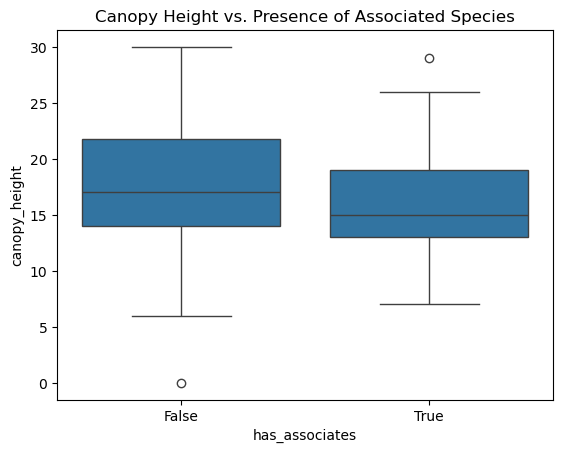

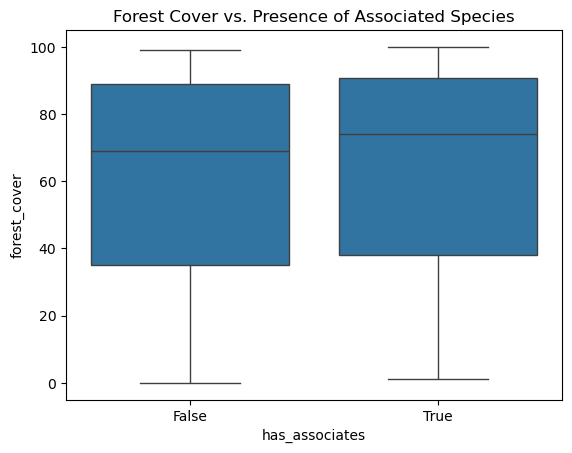

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=gdf, x="has_associates", y="canopy_height")
plt.title("Canopy Height vs. Presence of Associated Species")
plt.show()

sns.boxplot(data=gdf, x="has_associates", y="forest_cover")
plt.title("Forest Cover vs. Presence of Associated Species")
plt.show()


In [98]:
def classify_agroforestry(row):
    if pd.isna(row["canopy_height"]) or pd.isna(row["forest_cover"]) or pd.isna(row["land_use_class"]):
        return "Unknown"
    
    if row["canopy_height"] >= 6 and row["forest_cover"] >= 50 and row["land_use_class"] in ["Tree cover", "Cropland"]:
        return "Likely agroforestry"
    
    if row["canopy_height"] < 3 and row["forest_cover"] < 30 and row["land_use_class"] in ["Grassland", "Built-up"]:
        return "Likely sun-grown"
    
    return "Mixed or unclear"

gdf["system_type"] = gdf.apply(classify_agroforestry, axis=1)


In [99]:
gdf

,uid,geometry,key_species,associated_species,canopy_height,forest_cover,land_use,land_use_class,has_associates,system_type
0,28,POINT (-70.62000 18.98000),Coffea arabica,{},17.0,88.0,10.0,Tree cover,False,Likely agroforestry
1,81,POINT (-71.22754 19.60170),Theobroma cacao,{},6.0,0.0,10.0,Tree cover,False,Mixed or unclear
2,247,POINT (-69.65000 18.52000),Coffea arabica,{Plantago major},10.0,70.0,30.0,Grassland,True,Mixed or unclear
3,322,POINT (-69.94000 18.48000),Coffea arabica,"{Tectaria heracleifolia, Annona haitiensis, Po...",NaN,NaN,50.0,Built-up,True,Unknown
4,500,POINT (-71.44000 18.60000),Coffea arabica,{},12.0,29.0,30.0,Grassland,False,Mixed or unclear
...,...,...,...,...,...,...,...,...,...,...
131,584677,POINT (-69.46615 19.06785),Theobroma cacao,"{Pteris tripartita, Guarea guidonia, Spathodea...",25.0,92.0,10.0,Tree cover,True,Likely agroforestry
132,584796,POINT (-70.41442 19.75092),Musa acuminata,"{Crescentia cujete, Terminalia catappa, Euphor...",8.0,21.0,10.0,Tree cover,True,Mixed or unclear
133,584990,POINT (-69.48076 18.67022),Theobroma cacao,{},14.0,35.0,30.0,Grassland,False,Mixed or unclear
134,585046,POINT (-71.29601 18.11522),Coffea arabica,{},28.0,97.0,10.0,Tree cover,False,Likely agroforestry


In [100]:
import folium
import geopandas as gpd

# Make sure your GeoDataFrame is in WGS84 (lat/lon)
gdf_latlon = gdf.to_crs(epsg=4326)

# Define colours for agroforestry types
color_map = {
    "Likely agroforestry": "green",
    "Likely sun-grown": "orange",
    "Mixed or unclear": "purple",
    "Unknown": "gray"
}

# Get map center
centroid = gdf_latlon.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=8, tiles=None)

# Add satellite basemap
folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
    attr="Esri World Imagery",
    name="Esri Satellite",
    overlay=False,
    control=True
).add_to(m)

# Add points
for _, row in gdf_latlon.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color=color_map.get(row["system_type"], "black"),
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(f"""
            <b>Key species:</b> {row['key_species']}<br>
            <b>Canopy height:</b> {row['canopy_height']} m<br>
            <b>Forest cover:</b> {row['forest_cover']} %<br>
            <b>Land use:</b> {row['land_use_class']}<br>
            <b>Type:</b> {row['system_type']}
        """, max_width=250)
    ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Show map
m


In [103]:
# Group species by unique geometry
gdf_grouped = (
    gdf_latlon.groupby("geometry")[["key_species", "canopy_height", "forest_cover", "land_use_class", "system_type"]]
    .agg({
        "key_species": lambda x: ", ".join(sorted(set(x))),
        "canopy_height": "mean",
        "forest_cover": "mean",
        "land_use_class": lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown",
        "system_type": lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown"
    })
    .reset_index()
)

# Reproject for plotting if not already done
gdf_grouped = gpd.GeoDataFrame(gdf_grouped, geometry="geometry", crs="EPSG:4326")

# Create map
from folium.plugins import MarkerCluster
import folium

centroid = gdf_grouped.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=8, tiles=None)

folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
    attr="Esri World Imagery",
    name="Esri Satellite",
    overlay=False,
    control=True
).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for _, row in gdf_grouped.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color=color_map.get(row["system_type"], "black"),
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(f"""
            <b>All species:</b> {row['key_species']}<br>
            <b>Canopy height:</b> {row['canopy_height']:.1f} m<br>
            <b>Forest cover:</b> {row['forest_cover']:.1f} %<br>
            <b>Land use:</b> {row['land_use_class']}<br>
            <b>Type:</b> {row['system_type']}
        """, max_width=300)
    ).add_to(marker_cluster)

folium.LayerControl().add_to(m)
m


In [114]:
def safe_join(s):
    if isinstance(s, set):
        return ", ".join(sorted(str(item) for item in s if pd.notna(item)))
    return ""

gdf["associated_species"] = gdf["associated_species"].apply(safe_join)
gdf.to_file("/Users/szelie/data/unu/agroforestry_systems/dominican_republic.geojson", driver="GeoJSON")


# let's compare the number of observations to a study which found the following species with a certain percentage:

In [121]:
import pandas as pd

# Data from Deheuvels (2015)
deheuvels_species_data = [
    {"species": "Musa AAA", "percentage": 27.0},
    {"species": "Citrus sinensis", "percentage": 5.0},
    {"species": "Jatropha curcas", "percentage": 5.0},
    {"species": "Persea americana", "percentage": 4.0},
    {"species": "Erythrina poeppigiana", "percentage": 3.5},
    {"species": "Colocarpum mammosum", "percentage": 3.0},
    {"species": "Roystonea hispaniolana", "percentage": 2.5},
    {"species": "Mangifera indica", "percentage": 2.5},
    {"species": "Citrus aurantiifolia", "percentage": 2.0},
    {"species": "Citrus reticulata", "percentage": 1.0},
    {"species": "Enterolobium cyclocarpum", "percentage": 0.8},
    {"species": "Theobroma cacao", "percentage": 0.6},
    {"species": "Annona muricata", "percentage": 0.6},
    {"species": "Genipa americana", "percentage": 0.5},
    {"species": "Inga vera", "percentage": 0.5},
    {"species": "Karwinskia caloneura", "percentage": 0.4},
    {"species": "Necranda antillana", "percentage": 0.4},
    {"species": "Cupania americana", "percentage": 0.3},
    {"species": "Spirtoecoma rubriflora", "percentage": 0.3},
    {"species": "Bixa orellana", "percentage": 0.3},
    {"species": "Casimiroa edulis", "percentage": 0.3},
    {"species": "Cedrela odorata", "percentage": 0.3},
    {"species": "Citrus sp.", "percentage": 0.3},
    {"species": "Morabobotti", "percentage": 0.2},
    {"species": "Tamarindus indica", "percentage": 0.2},
    {"species": "Bursera simaruba", "percentage": 0.2},
    {"species": "Ceiba pentandra", "percentage": 0.2},
    {"species": "Cajanus indicus", "percentage": 0.2},
    {"species": "Passiflora edulis", "percentage": 0.2},
    {"species": "Piper aduncum", "percentage": 0.2},
    {"species": "Psidium guajava", "percentage": 0.2},
    {"species": "Syzygium malaccense", "percentage": 0.2},
    {"species": "Trichillia hirta", "percentage": 0.2}
]

df_deheuvels = pd.DataFrame(deheuvels_species_data)


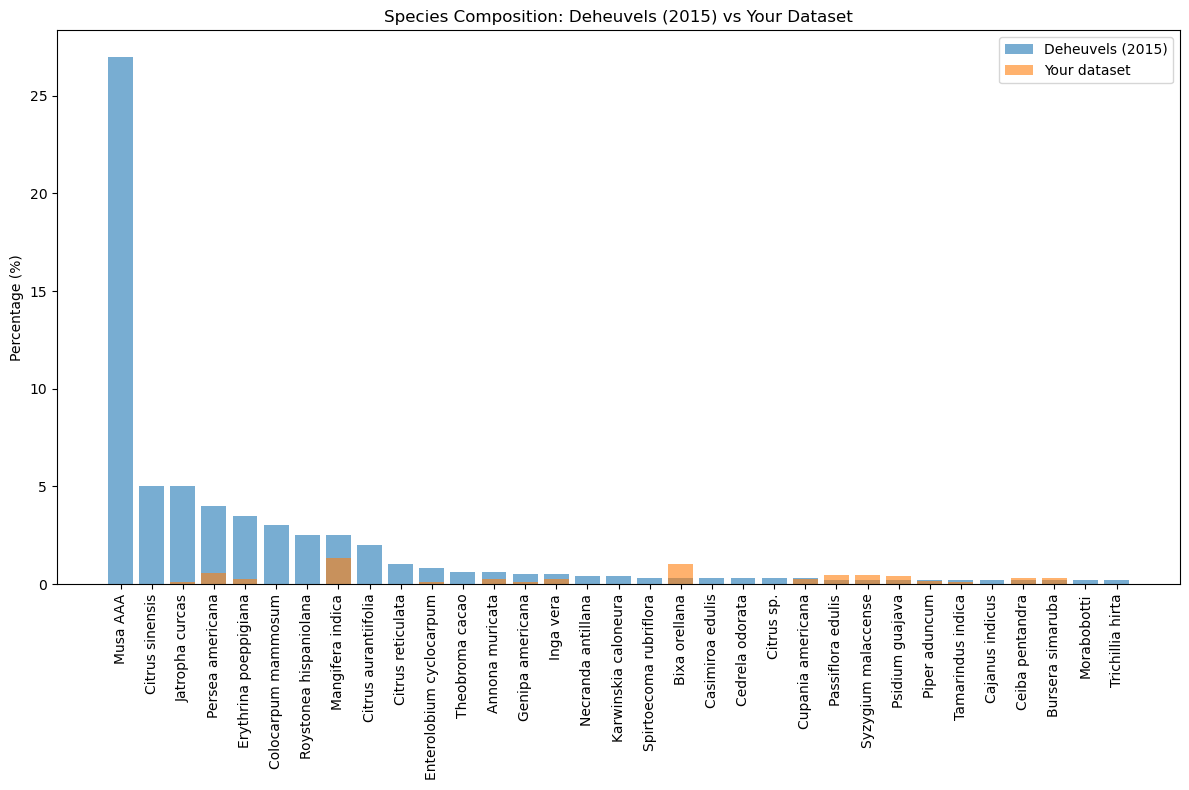

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Deheuvels species data
deheuvels_species_data = [
    {"species": "Musa AAA", "percentage": 27.0},
    {"species": "Citrus sinensis", "percentage": 5.0},
    {"species": "Jatropha curcas", "percentage": 5.0},
    {"species": "Persea americana", "percentage": 4.0},
    {"species": "Erythrina poeppigiana", "percentage": 3.5},
    {"species": "Colocarpum mammosum", "percentage": 3.0},
    {"species": "Roystonea hispaniolana", "percentage": 2.5},
    {"species": "Mangifera indica", "percentage": 2.5},
    {"species": "Citrus aurantiifolia", "percentage": 2.0},
    {"species": "Citrus reticulata", "percentage": 1.0},
    {"species": "Enterolobium cyclocarpum", "percentage": 0.8},
    {"species": "Theobroma cacao", "percentage": 0.6},
    {"species": "Annona muricata", "percentage": 0.6},
    {"species": "Genipa americana", "percentage": 0.5},
    {"species": "Inga vera", "percentage": 0.5},
    {"species": "Karwinskia caloneura", "percentage": 0.4},
    {"species": "Necranda antillana", "percentage": 0.4},
    {"species": "Cupania americana", "percentage": 0.3},
    {"species": "Spirtoecoma rubriflora", "percentage": 0.3},
    {"species": "Bixa orellana", "percentage": 0.3},
    {"species": "Casimiroa edulis", "percentage": 0.3},
    {"species": "Cedrela odorata", "percentage": 0.3},
    {"species": "Citrus sp.", "percentage": 0.3},
    {"species": "Morabobotti", "percentage": 0.2},
    {"species": "Tamarindus indica", "percentage": 0.2},
    {"species": "Bursera simaruba", "percentage": 0.2},
    {"species": "Ceiba pentandra", "percentage": 0.2},
    {"species": "Cajanus indicus", "percentage": 0.2},
    {"species": "Passiflora edulis", "percentage": 0.2},
    {"species": "Piper aduncum", "percentage": 0.2},
    {"species": "Psidium guajava", "percentage": 0.2},
    {"species": "Syzygium malaccense", "percentage": 0.2},
    {"species": "Trichillia hirta", "percentage": 0.2}
]
df_deheuvels = pd.DataFrame(deheuvels_species_data)
df_deheuvels['species_lower'] = df_deheuvels['species'].str.lower()

# Count occurrences in your gdf
from collections import Counter

def parse_species(cell):
    if isinstance(cell, str):
        return [s.strip().lower() for s in cell.split(",")]
    return []

species_counter = Counter()
for val in gdf["associated_species"]:
    species_list = parse_species(val)
    species_counter.update(species_list)

df_counts = pd.DataFrame.from_dict(species_counter, orient='index', columns=['count']).reset_index()
df_counts.columns = ['species_lower', 'your_count']

# Normalize to %
df_counts['your_pct'] = 100 * df_counts['your_count'] / df_counts['your_count'].sum()

# Merge with Deheuvels
df_compare = df_deheuvels.merge(df_counts, on='species_lower', how='left')
df_compare = df_compare.fillna({'your_count': 0, 'your_pct': 0})
df_compare = df_compare.sort_values('percentage', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
x = range(len(df_compare))
plt.bar(x, df_compare['percentage'], label='Deheuvels (2015)', alpha=0.6)
plt.bar(x, df_compare['your_pct'], label='Your dataset', alpha=0.6)
plt.xticks(x, df_compare['species'], rotation=90)
plt.ylabel('Percentage (%)')
plt.title('Species Composition: Deheuvels (2015) vs Your Dataset')
plt.legend()
plt.tight_layout()
plt.show()


In [132]:
df_compare

,species_x,percentage,species_lower,species_y,count
0,Musa AAA,27.0,musa aaa,NaN,NaN
1,Citrus sinensis,5.0,citrus sinensis,NaN,NaN
2,Jatropha curcas,5.0,jatropha curcas,jatropha curcas,1.0
3,Persea americana,4.0,persea americana,persea americana,7.0
4,Erythrina poeppigiana,3.5,erythrina poeppigiana,erythrina poeppigiana,3.0
5,Colocarpum mammosum,3.0,colocarpum mammosum,NaN,NaN
6,Roystonea hispaniolana,2.5,roystonea hispaniolana,NaN,NaN
7,Mangifera indica,2.5,mangifera indica,mangifera indica,17.0
8,Citrus aurantiifolia,2.0,citrus aurantiifolia,NaN,NaN
9,Citrus reticulata,1.0,citrus reticulata,NaN,NaN
